# Machine Learning Advanced Project using Pokemon Dataset

## Table of Contents

1. [Description](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Loading and Description](#section3)<br>
4. [Data Pre-Processing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Feature Engineering](#section6)<br>
7. [Model Development & Evaluation](#section7)<br>
8. [Model Comparison](#section8)<br>
9. [Conclusion](#section9)<br>

<a id=section1></a>

## 1. Description

### Pokemon Dataset

This dataset contains information on 801 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc.

### The Dataset

The following columns / features are available for each pokemon and included within the CSV:

- name: The English name of the Pokemon
- japanese_name: The Original Japanese name of the Pokemon
- pokedex_number: The entry number of the Pokemon in the National Pokedex
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
- height_m: Height of the Pokemon in metres
- weight_kg: The Weight of the Pokemon in kilograms
- capture_rate: Capture Rate of the Pokemon
- base_egg_steps: The number of steps required to hatch an egg of the Pokemon
- abilities: A stringified list of abilities that the Pokemon is capable of having
- experience_growth: The Experience Growth of the Pokemon
- base_happiness: Base Happiness of the Pokemon
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- is_legendary: Denotes if the Pokemon is legendary.

<a id=section2></a>

## 2. Problem Statement

This project is to practice & implement Machine Learning Concepts learned till now. The notebook has observations with each step in order to explain thoroughly how to approach the data set.

The ultimate goal would be to develop a model to recognize if pokemon is legendary. As the target variable is legendary (0/1), I would be using classification algorithms and also evaluate the models using possible __Model Evaluation Techniques__.

Dataset Source : https://github.com/insaid2018/Term-4/tree/master/Projects

The **target feature** in the acquired data set is **is_legendary**.

|Target Feature|Potential Values|
| :-- | :-- |
|is_legendary|0: Not Legendary|
||1: Legendary|

Confusion Matrix for this Dataset

- How many non legendary pokemons we predict as non lengedary pokemons (TN = True Negative)
- How many non legendary pokemons we predict as legendary pokemons (FP = False Positive)
- How many legendary pokemons we predict as non lengedary pokemons (FN = False Negative)
- How many legendary pokemons we predict as legendary pokemons (TP = True Positive)

In this Dataset, Reducing False Positives & False Negatives are Equally Important. Hence __Precision__ & __Recall__ Scores should have Same Weightage.

<a id=section3></a>

## 3. Data Loading and Description

### Import Packages

In [1]:
#Import Required Packages for EDA
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

# To apply seaborn whitegrid style to the plots.
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# To adjust seaborn settings for the plots.
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#Multiple Prints in same Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#Models Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Model Scores, Report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Load Data

In [2]:
df_pokemon = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/pokemon.csv')
df_pokemon.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

### Check the shape of the dataset

In [3]:
df_pokemon.shape

(801, 41)

### Check the columns

In [4]:
df_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Check the descriptive statistics of the dataset

In [5]:
df_pokemon.describe().T

count          mean            std        min        25%  \
against_bug        801.0  9.962547e-01       0.597248       0.25        0.5   
against_dark       801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon     801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric   801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy      801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight      801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire       801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying     801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost      801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass      801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground     801.0  1.098002e+00       0.738818       0.00        1.0   
against_ice        801.0  1.208177e+00       0.735356       0.25        0.5   
against_normal     801.0  8.870162e-01       0.266106       0.00        1.0   
against_poison     801.0  9.753433e-01       0.549375       0.00        0.5   
against_psychic    801.0  1.005306e+00       0.495183       0.00        1.0   
against_rock       801.0  1.250312e+00       0.697148       0.25        1.0   
against_steel      801.0  9.834582e-01       0.500117       0.25        0.5   
against_water      801.0  1.058365e+00       0.606562       0.25        0.5   
attack             801.0  7.785768e+01      32.158820       5.00       55.0   
base_egg_steps     801.0  7.191011e+03    6558.220422    1280.00     5120.0   
base_happiness     801.0  6.536205e+01      19.598948       0.00       70.0   
base_total         801.0  4.283770e+02     119.203577     180.00      320.0   
defense            801.0  7.300874e+01      30.769159       5.00       50.0   
experience_growth  801.0  1.054996e+06  160255.835096  600000.00  1000000.0   
height_m           781.0  1.163892e+00       1.080326       0.10        0.6   
hp                 801.0  6.895880e+01      26.576015       1.00       50.0   
percentage_male    703.0  5.515576e+01      20.261623       0.00       50.0   
pokedex_number     801.0  4.010000e+02     231.373075       1.00      201.0   
sp_attack          801.0  7.130587e+01      32.353826      10.00       45.0   
sp_defense         801.0  7.091136e+01      27.942501      20.00       50.0   
speed              801.0  6.633458e+01      28.907662       5.00       45.0   
weight_kg          781.0  6.137810e+01     109.354766       0.10        9.0   
generation         801.0  3.690387e+00       1.930420       1.00        2.0   
is_legendary       801.0  8.739076e-02       0.282583       0.00        0.0   

                         50%        75%        max  
against_bug              1.0        1.0        4.0  
against_dark             1.0        1.0        4.0  
against_dragon           1.0        1.0        2.0  
against_electric         1.0        1.0        4.0  
against_fairy            1.0        1.0        4.0  
against_fight            1.0        1.0        4.0  
against_fire             1.0        2.0        4.0  
against_flying           1.0        1.0        4.0  
against_ghost            1.0        1.0        4.0  
against_grass            1.0        1.0        4.0  
against_ground           1.0        1.0        4.0  
against_ice              1.0        2.0        4.0  
against_normal           1.0        1.0        1.0  
against_poison           1.0        1.0        4.0  
against_psychic          1.0        1.0        4.0  
against_rock             1.0        2.0        4.0  
against_steel            1.0        1.0        4.0  
against_water            1.0        1.0        4.0  
attack                  75.0      100.0      185.0  
base_egg_steps        5120.0     6400.0    30720.0  
base_happiness          70.0       70.0      140.0  
base_total             435.0      505.0      780.0  
defense                 70.0      

### Check the info of the dataset

In [6]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

__Inference:__
- Data Type for capture_rate feature is shown as **object** instead of **int64 / float64**
- Name of **classfication** Feature should be **classification**

<a id=section4></a>

## 4. Data Pre-Processing

### Treatment for Correction of Data Types

In [7]:
df1 = df_pokemon.copy()
df1['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

- We have alphanumeric value '30 (Meteorite)255 (Core)' due to which data type for capture_rate feature is **object**
- Replace this weird value with the lower value out of 30 and 255 i.e. 30

In [8]:
df1['capture_rate'].replace('30 (Meteorite)255 (Core)', '30', inplace=True)
df1['capture_rate'] = df1['capture_rate'].astype(int)

### Rename Column Name for classfication feature

In [9]:
df1.rename(columns = {'classfication':'classification'}, inplace = True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

- Data Type for capture_rate is converted to **int** from **object**
- Name of **classfication** Feature is changed to **classification**

### Check if there are any Missing / null values present

In [11]:
df1.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classification         0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


__Observations:__
- Missing Values Present in height_m, percentage_male, type2 & weight_kg Features

### For Visualization if Missing Values are Present

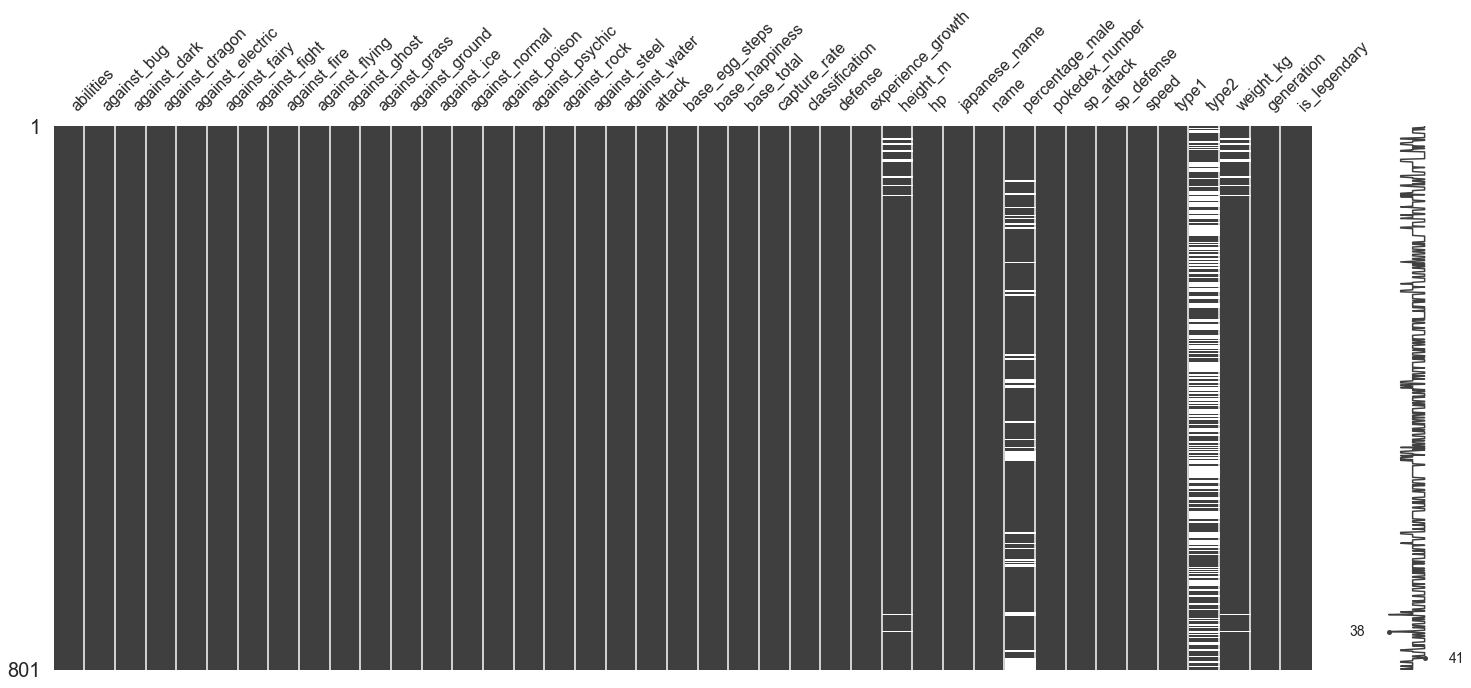

In [12]:
msno.matrix(df1)

__Inference:__
- Confirming Missing Values are Present in height_m, percentage_male, type2 & weight_kg Features through Visualization

### Treatment for Missing Values

- Some Pokemons doesn't have secondary type so they have NaN (null values) in the type2 column. Let's fill in the null values in the type2 column by replacing it with 'None'
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless
- Hence Genderless Pokemons can be assigned '-1'
- Replace Missing Values in height_m & weight_kg features by median values of respective columns

In [13]:
df2 = df1.copy()
df2['type2'].fillna(value='None', inplace=True)
df2['percentage_male'].fillna(np.int(-1), inplace=True)
df2['height_m'].fillna(df2['height_m'].median(), inplace=True)
df2['weight_kg'].fillna(df2['weight_kg'].median(), inplace=True)

In [14]:
df2.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classification       0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

__Observations:__
- No More Missing Values

### Check for Duplicated Rows

In [15]:
duplicateRows = df2[df2.duplicated(keep=False)]
duplicateRows

Empty DataFrame
Columns: [abilities, against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, against_poison, against_psychic, against_rock, against_steel, against_water, attack, base_egg_steps, base_happiness, base_total, capture_rate, classification, defense, experience_growth, height_m, hp, japanese_name, name, percentage_male, pokedex_number, sp_attack, sp_defense, speed, type1, type2, weight_kg, generation, is_legendary]
Index: []

[0 rows x 41 columns]

#### Observations:
- No Duplicated Rows Present

<a id=section5></a>

## 5. Exploratory Data Analysis

### Univariate Analysis

#### Distribution of Pokemons Based on Generation

In [16]:
# sns.factorplot(
#     x='generation',
#     data=df2,
#     kind='count',
#     size=5,
#     aspect=1.2
# ).set_axis_labels('Generation', '# of Pokemon')

fig = px.histogram(df2, x='generation', color='generation')
fig.update_layout(
    title="No. of Pokemons Based on Generation",
    xaxis={'title':'Generation'},
    yaxis={'title':'No. of Pokemons'}
    )

In [17]:
fig = px.pie(values=df2['generation'].value_counts(), names=df2['generation'].value_counts().index,
             title='Percentage Distribution Based on Generation')
fig.show()

__Inference:__
- No Trend is seen based on Generation. However No. of Pokemons are decreased for every Even Generation (i.e 2, 4, 6)
- Generation 5 is Most Common, Every 1 in 5 Pokemon is from Generation 5

#### Distribution of Pokemons Based on Type 1

In [18]:
# sns.factorplot(
#     y='type1',
#     data=df2,
#     kind='count',
#     order=df2['type1'].value_counts().index,
#     aspect=2,
#     color='green'
# ).set_axis_labels('No. of Pokemons', 'Type 1')

# df2['type1'].value_counts().plot.bar()

fig = px.histogram(df2, x='type1', color='type1')
fig.update_layout(
    title="No. of Pokemons Based on Type1",
    xaxis={'title':'Type1', 'categoryorder':'total descending'},
    yaxis={'title':'No. of Pokemons'}
    )

In [19]:
fig = px.treemap(df2, path=['type1','name'], 
                 hover_data=['generation','type1','is_legendary','height_m','weight_kg'],
                 color='type1')
fig.update_layout(title='Primary Types of Pokemon with their Name')

__Inference:__
- Water Type is the most common Primary Type of Pokemon. Every 1 in 7 (114 out of 801) Pokemon has Primary Type as Water
- Flying Type Pokemon as the Primary Type are very rare 

#### Distribution of Pokemons Based on Type 2

In [20]:
fig = px.histogram(df2, x='type2', color='type2')
fig.update_layout(
    title="No. of Pokemons Based on Type2",
    xaxis={'title':'Type2', 'categoryorder':'total descending'},
    yaxis={'title':'No. of Pokemons'}
    )

__Observation:__
- Most of Pokemons (384 / 801 = 47.94%) don't have Secondary Type, **None** in our case
- In Constrast to Primary Types, Flying Type Pokemon are the most common when it comes to Secondary Type Pokemons

#### Distribution of Pokemons Based on Classification

In [21]:
fig = px.treemap(df2, path=['classification'], color='classification')
fig.update_layout(title='Classification of Pokemons with their Count')

In [23]:
df2['classification'].nunique()

588

__Inference:__
- Pokemons have total of 588 Classifications
- Dragon Pokemon has highest count of 8 Pokemons

#### Plot Histogram for All Independent Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B677AF3C8>,
      dtype=object)

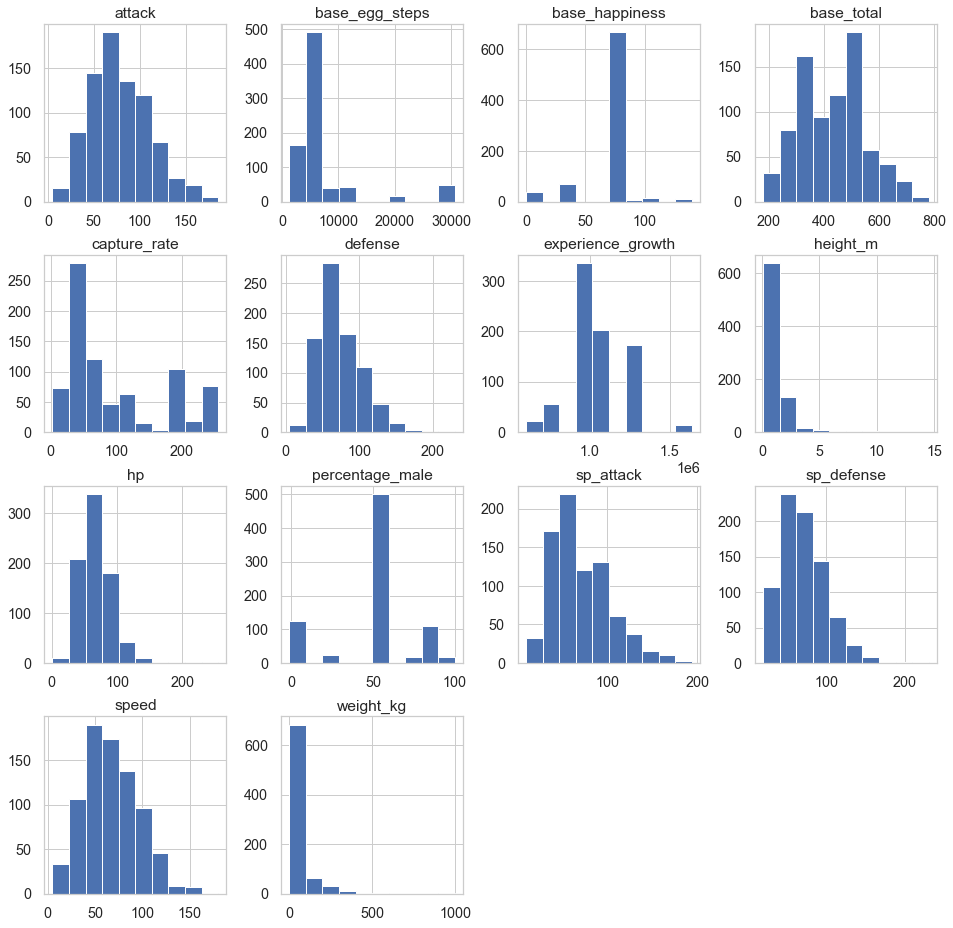

In [22]:
df2[['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',  'defense', 'experience_growth',
      'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']].hist(figsize=(16,16))

#### Inference:
- Visually features like base_egg_steps, capture_rate, defense, height_m, hp, sp_attack, sp_defense, speed and weight_kg are Skewed

#### Define Function for Calculation of Quartiles & Range for Detection of Outliers in Feature

In [24]:
def calc_range(df, feature):
    q1, q3 = df[feature].quantile([0.25,0.75])
    iqr = q3 - q1
    #Using Standard 1.5 IQR Rule for Range on Either Sides
    rang = 1.5 * iqr
    return (q1-rang, q3+rang)

#### Define Function for Calculating No. of Outliers Present in a Feature

In [25]:
def calc_outliers(df, feature):
    lower, upper = calc_range(df, feature)
    print("Lower Value for Outlier Detection : %.4f" % lower)
    print("Upper Value for Outlier Detection : %.4f" % upper)
    no_outliers = [df[feature] for i in df[feature] if i<lower or i>upper]
    print("Total No. of Samples : ", len(df[feature]))
    print("Total No. of Outliers : ", len(no_outliers))
    print("Total No. of Samples Remaining if Outliers are Removed : ", len(df[feature])-len(no_outliers))

#### Define Function for Plotting BoxPlot & KDE Plot for a Feature

In [26]:
def plot_feature(df, feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(df[feature], ax=axes[0])
    sns.distplot(df[feature], ax=axes[1], color='red')
    fig.set_size_inches(15,5)

#### Analyze Individual Features

Lower Value for Outlier Detection : -12.5000
Upper Value for Outlier Detection : 167.5000
Total No. of Samples :  801
Total No. of Outliers :  5
Total No. of Samples Remaining if Outliers are Removed :  796


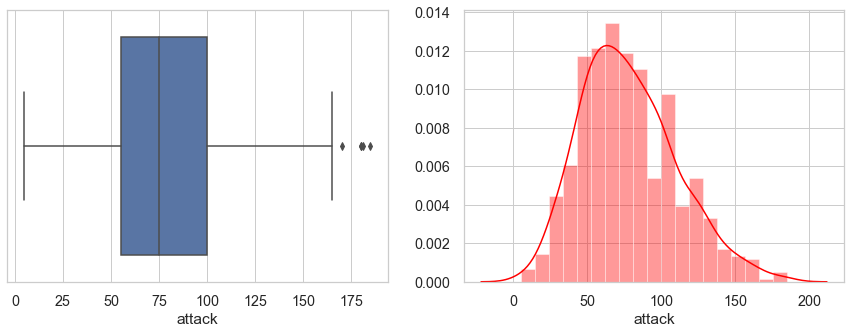

In [27]:
plot_feature(df2, 'attack')
calc_outliers(df2, 'attack')

#### Inference for attack
- We can see that all values in the above plots are matching with describe function used earlier
- Distribution is Positively Skewed as seen in Histogram Earlier.
- Outliers are Present in Right Tail Distribution Above Q3
- After Removing Outliers, we would have 796 Samples

##### Similiarly other Features can be Inferenced

Lower Value for Outlier Detection : -10.0000
Upper Value for Outlier Detection : 150.0000
Total No. of Samples :  801
Total No. of Outliers :  11
Total No. of Samples Remaining if Outliers are Removed :  790


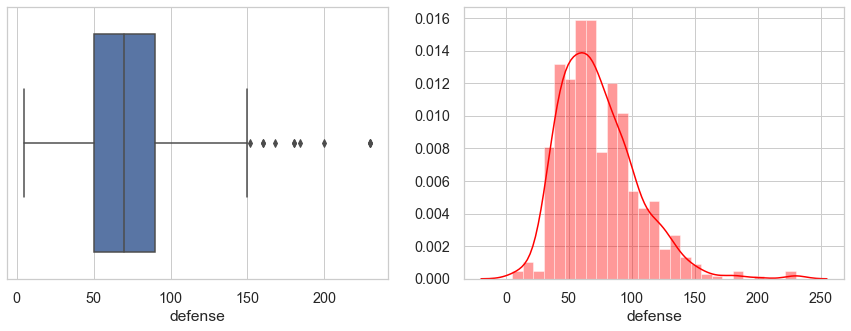

In [28]:
plot_feature(df2, 'defense')
calc_outliers(df2, 'defense')

Lower Value for Outlier Detection : -24.0000
Upper Value for Outlier Detection : 160.0000
Total No. of Samples :  801
Total No. of Outliers :  10
Total No. of Samples Remaining if Outliers are Removed :  791


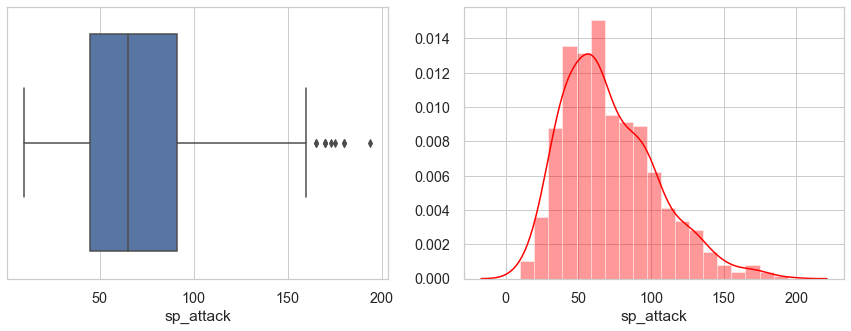

In [29]:
plot_feature(df2, 'sp_attack')
calc_outliers(df2,'sp_attack')

Lower Value for Outlier Detection : -10.0000
Upper Value for Outlier Detection : 150.0000
Total No. of Samples :  801
Total No. of Outliers :  6
Total No. of Samples Remaining if Outliers are Removed :  795


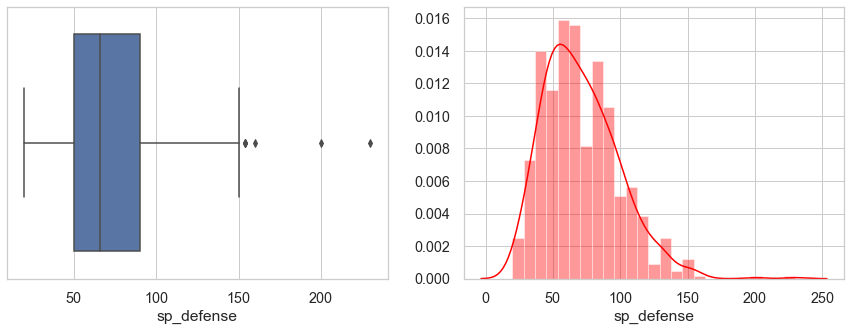

In [30]:
plot_feature(df2, 'sp_defense')
calc_outliers(df2, 'sp_defense')

In [31]:
plot_feature(df2, 'height_m')
calc_outliers(df2, 'height_m')

Lower Value for Outlier Detection : -0.7500
Upper Value for Outlier Detection : 2.8500
Total No. of Samples :  801
Total No. of Outliers :  31
Total No. of Samples Remaining if Outliers are Removed :  770


Lower Value for Outlier Detection : -69.0000
Upper Value for Outlier Detection : 139.8000
Total No. of Samples :  801
Total No. of Outliers :  82
Total No. of Samples Remaining if Outliers are Removed :  719


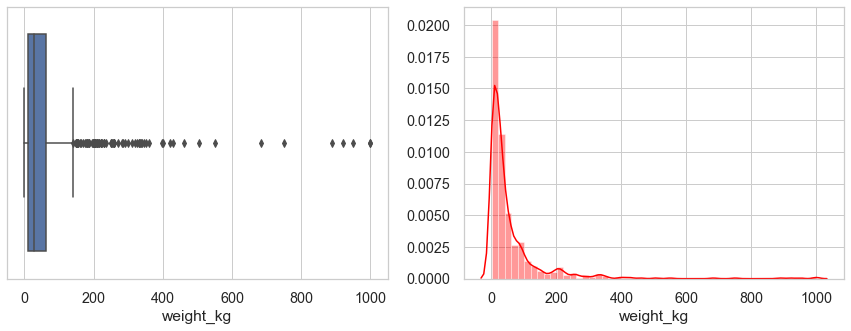

In [32]:
plot_feature(df2, 'weight_kg')
calc_outliers(df2, 'weight_kg')

Lower Value for Outlier Detection : -15.0000
Upper Value for Outlier Detection : 145.0000
Total No. of Samples :  801
Total No. of Outliers :  6
Total No. of Samples Remaining if Outliers are Removed :  795


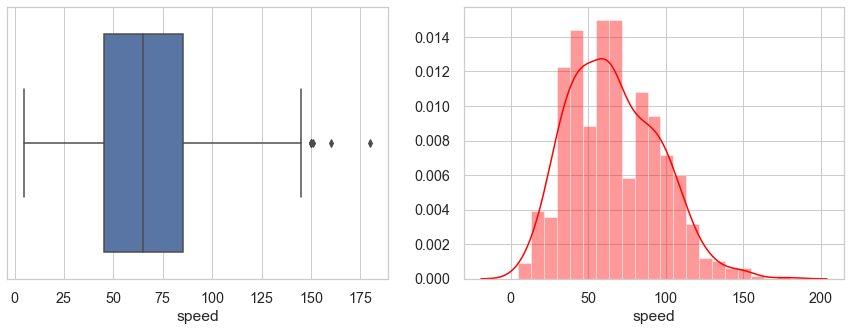

In [33]:
plot_feature(df2, 'speed')
calc_outliers(df2, 'speed')

Lower Value for Outlier Detection : 5.0000
Upper Value for Outlier Detection : 125.0000
Total No. of Samples :  801
Total No. of Outliers :  22
Total No. of Samples Remaining if Outliers are Removed :  779


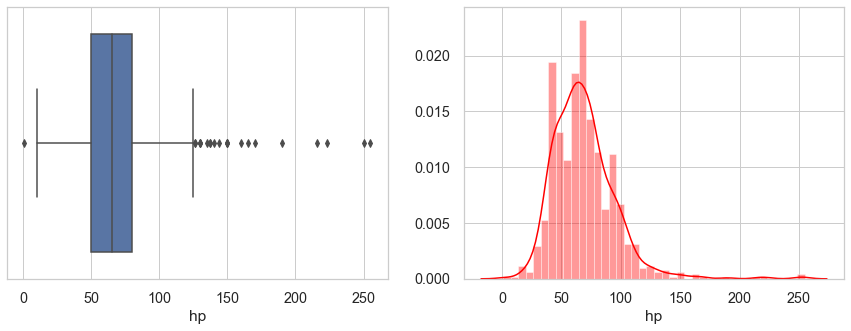

In [34]:
plot_feature(df2, 'hp')
calc_outliers(df2, 'hp')

#### Distribution of Target Variable

Text(0, 0.5, '')

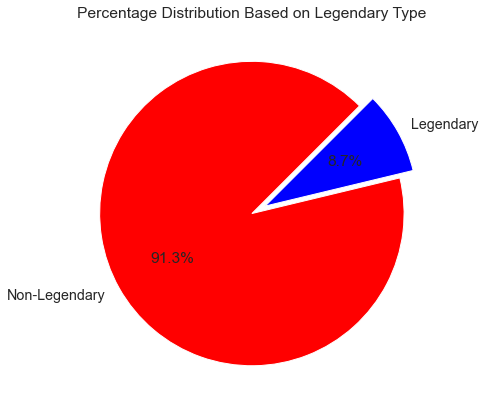

In [58]:
df2['is_legendary'].value_counts().plot(kind='pie',
                                        autopct='%1.1f%%',
                                        colors=['red','blue'],
                                        labels=['Non-Legendary','Legendary'],
                                        explode=(0, 0.1),
                                        startangle = 45,
                                        title='Percentage Distribution Based on Legendary Type',
                                        figsize=(7,7))
plt.ylabel('')

#sns.countplot(df2['is_legendary'])

In [36]:
df2['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

__Inference__:
- Dataset is Imbalanced as Majority of Pokemons are Non-Lengendary (i.e. 91.3%)

### Bivariate Analysis

#### Scatter Plot between Features Based on Target Variable

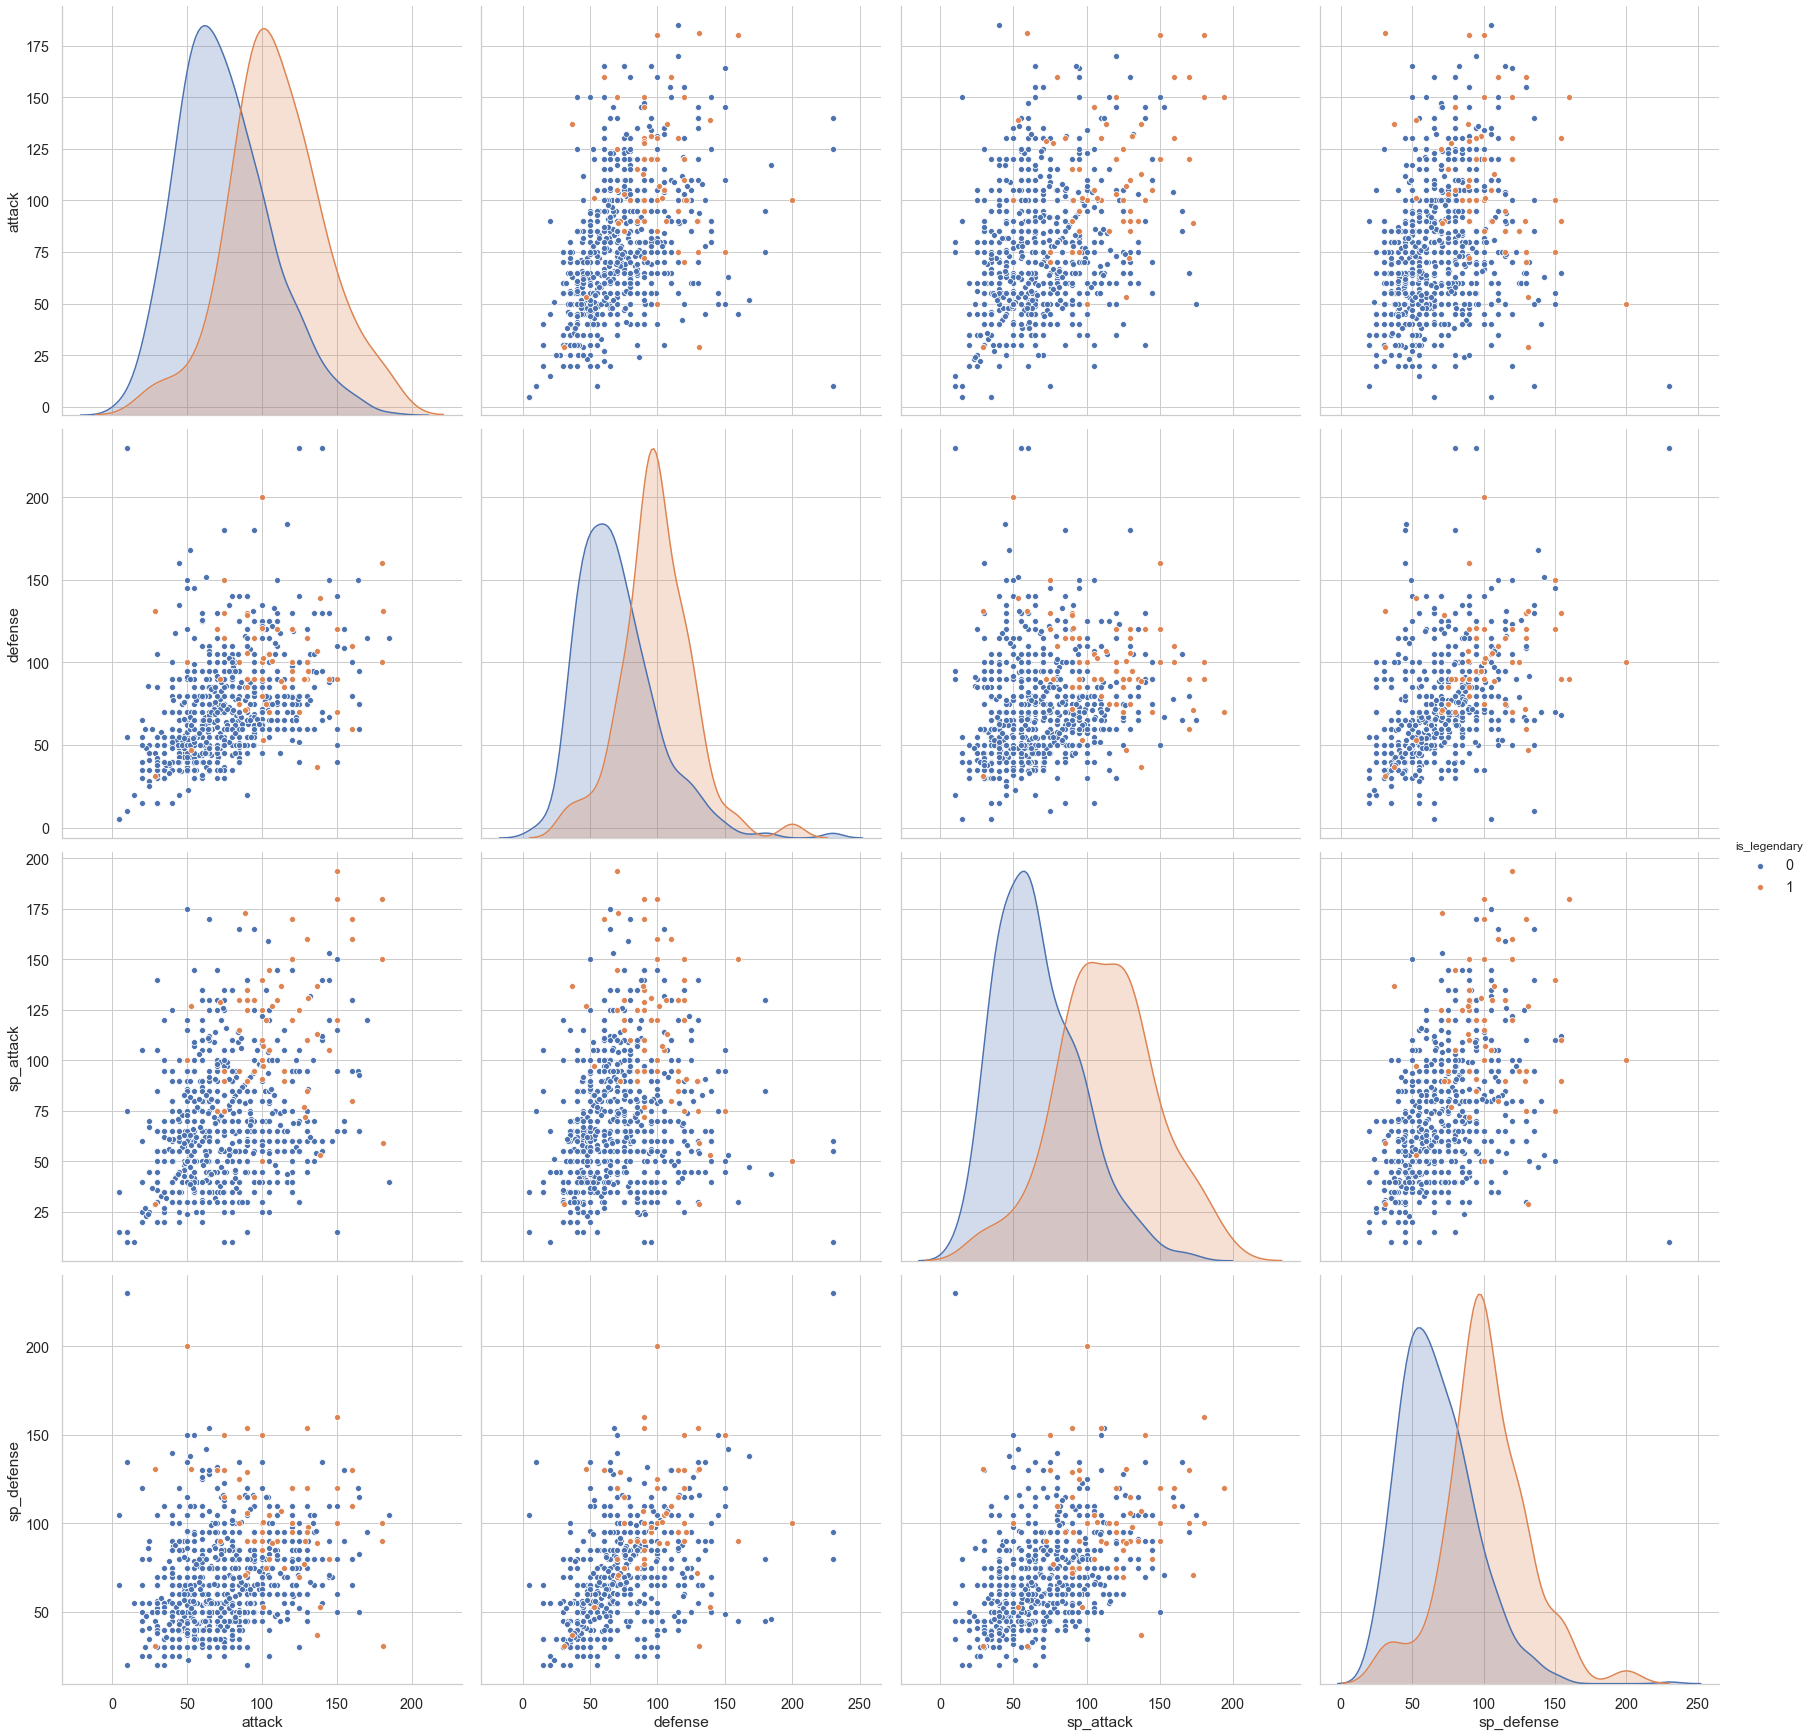

In [67]:
sns.pairplot(df2, vars=['attack', 'defense', 'sp_attack', 'sp_defense'], hue="is_legendary", size=6)

#Other Method to Plot Individual Scatter Plots Between Two Features
#sns.FacetGrid(df1, hue="is_legendary", size=5).map(plt.scatter, "attack", "defense").add_legend()

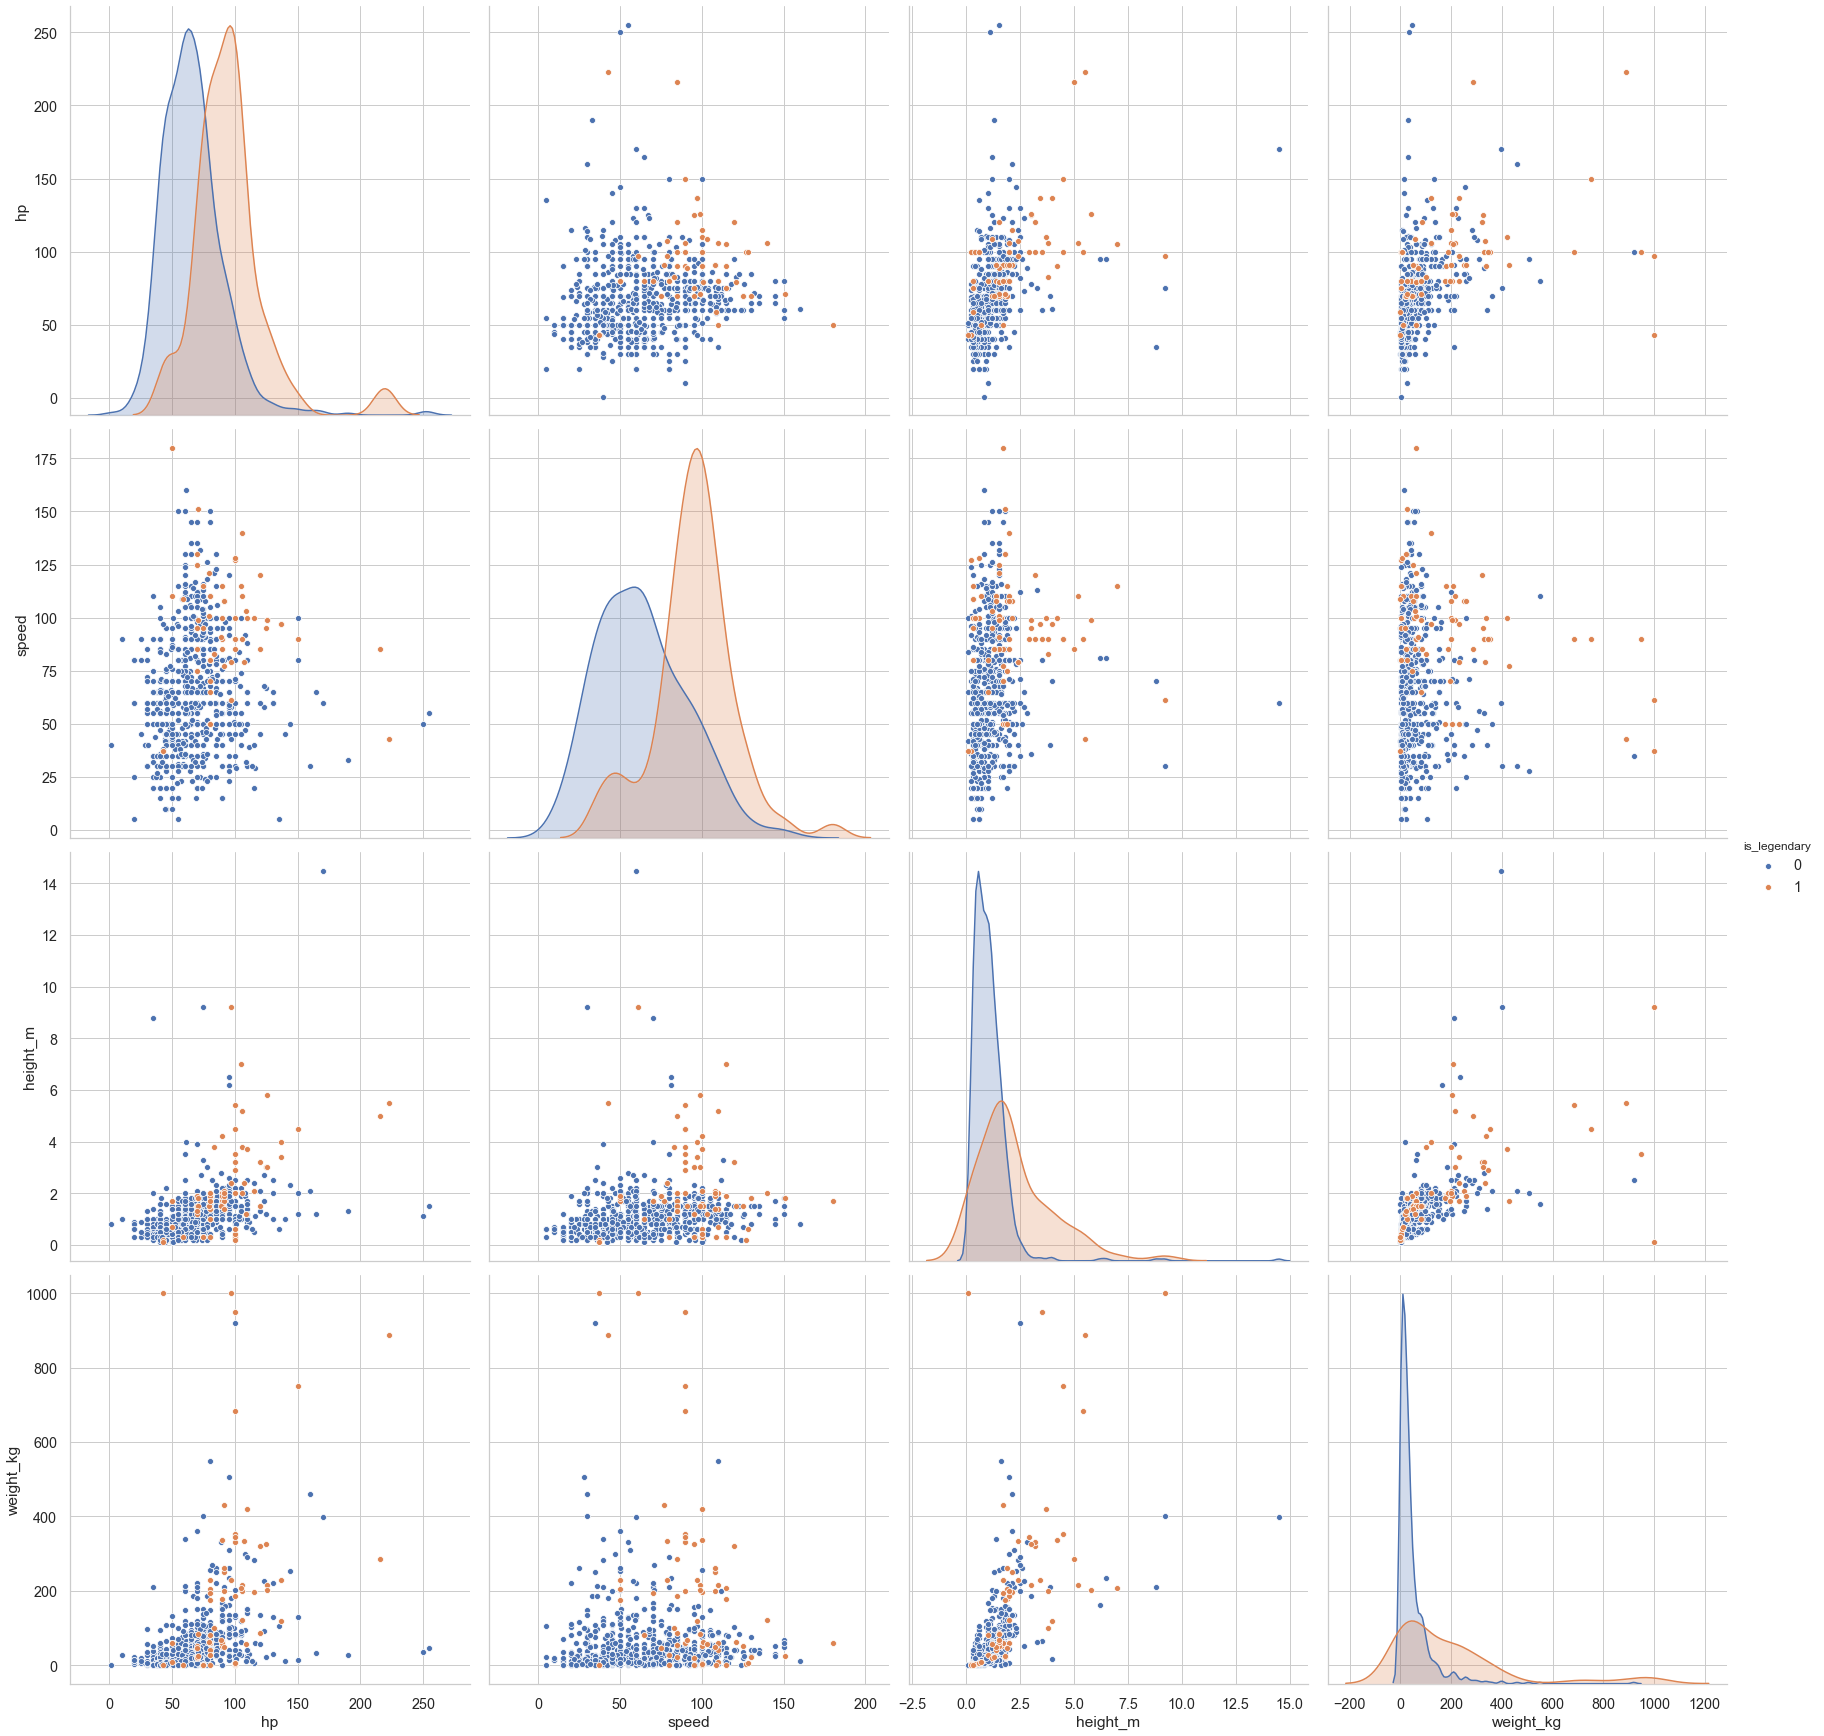

In [38]:
sns.pairplot(df2, vars=['hp', 'speed', 'height_m', 'weight_kg'], hue="is_legendary", size=6)

#### Define Function for Plotting BoxPlot & Violin Plot for a Feature against Target Variable

In [39]:
def plot_feature_across_target(df, feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(x='is_legendary', y=feature, data=df, ax=axes[0])
    sns.violinplot(x="is_legendary", y=feature, data=df, ax=axes[1])
    fig.set_size_inches(15,7)

#### Plotting the Features against the Target Variable

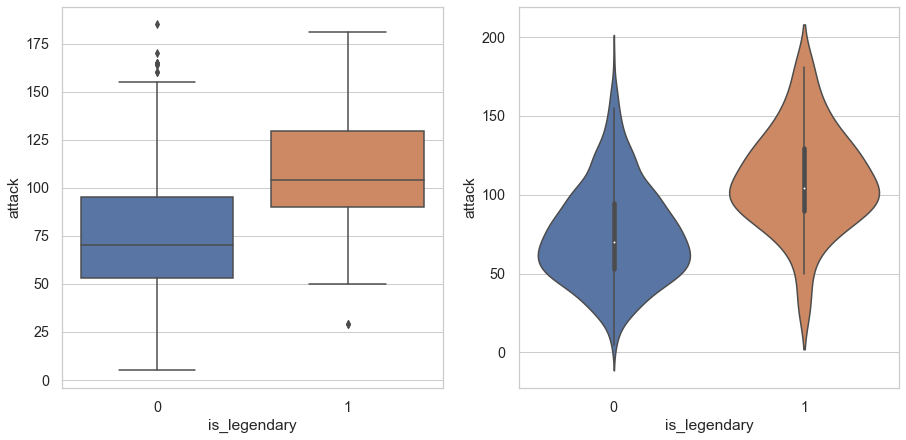

In [40]:
plot_feature_across_target(df2, 'attack')

__Inference :__
- Above BoxPlot & Violin Plot Tells us Base Attack of Legendary Pokemons is Higher Compared to Non-Legendary Pokemons

##### Similiarly other Features can be Inferenced

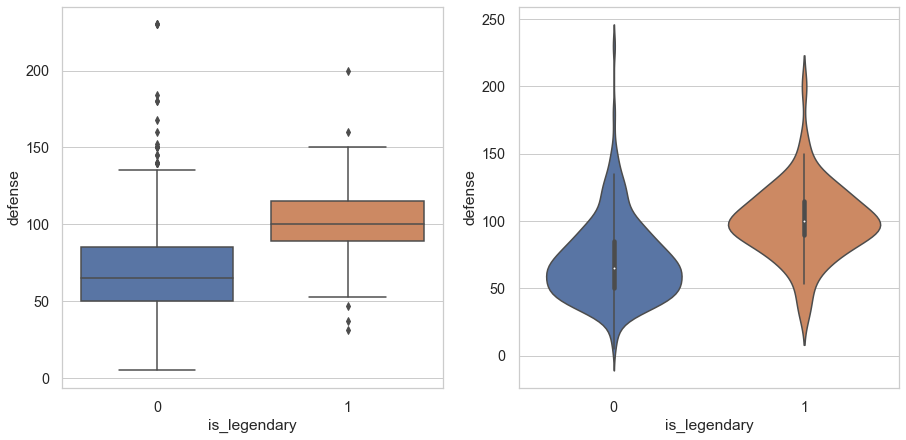

In [41]:
plot_feature_across_target(df2, 'defense')

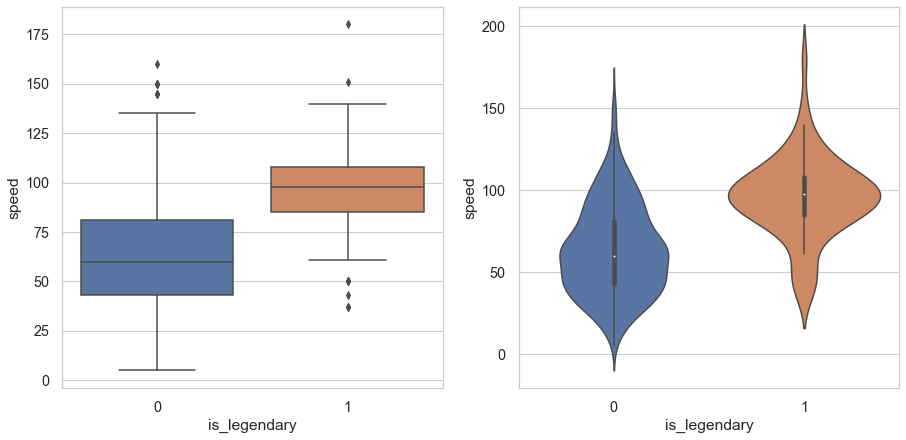

In [42]:
plot_feature_across_target(df2, 'speed')

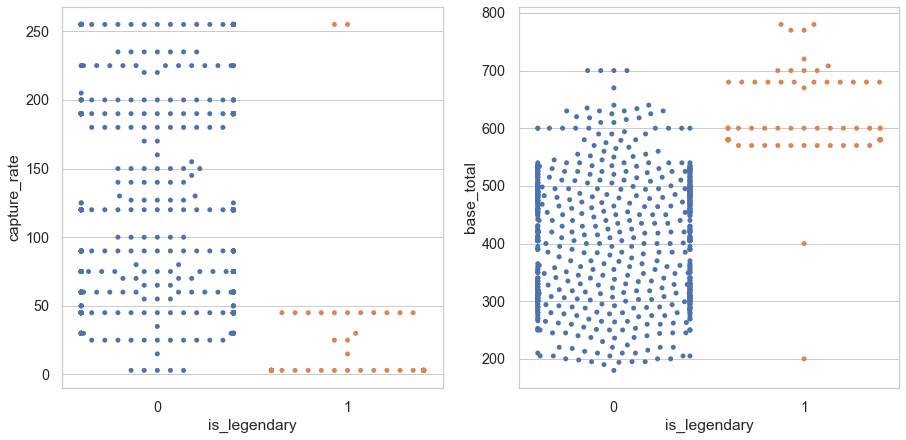

In [94]:
fig,axes=plt.subplots(1,2)
sns.swarmplot(x="is_legendary", y='capture_rate', data=df2, ax=axes[0])
sns.swarmplot(x='is_legendary', y='base_total', data=df2, ax=axes[1])
fig.set_size_inches(15,7)

__Inference:__
- Capturing Legendary Pokemon is tougher than Capturing Non-Legendary Pokemon
- Legendary Pokemon are more stronger than their Non-Legendary counterparts based on base_total feature

#### Distribution based on various combinations of primary and secondary types of Pokemon

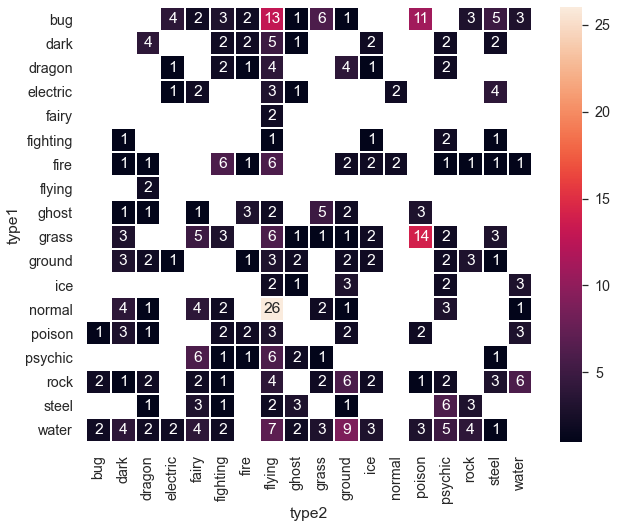

In [43]:
dual_types = df2[df2['type2'] != 'None']
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    dual_types.groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    ax=ax
)

The five most common combinations of primary and secondary type are in order:
- Normal / Flying
- Grass / Poison
- Bug / Flying
- Bug / Poison
- Water / Ground

#### Distribution of Pokemons Based on Generation & Target Variable

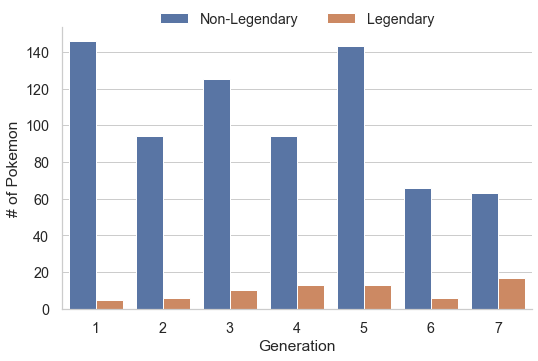

In [60]:
g = sns.factorplot(
    x='generation',
    data=df2,
    kind='count',
    hue='is_legendary',
    size=5,
    aspect=1.5,
    legend=False
).set_axis_labels('Generation', '# of Pokemon')

g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=True, ncol=2, labels=['Non-Legendary','Legendary'])

# Stacked Bar Chart
# df2.groupby(['generation', 'is_legendary']).size().unstack().plot(kind='bar', figsize=(15, 7), stacked=True)

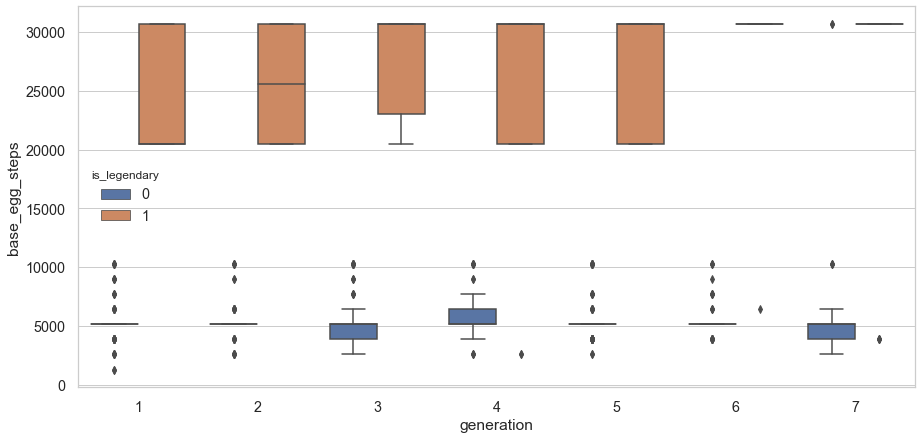

In [70]:
fig,axes=plt.subplots()
sns.boxplot(x='generation', y='base_egg_steps', hue='is_legendary', data=df2)
fig.set_size_inches(15,7)

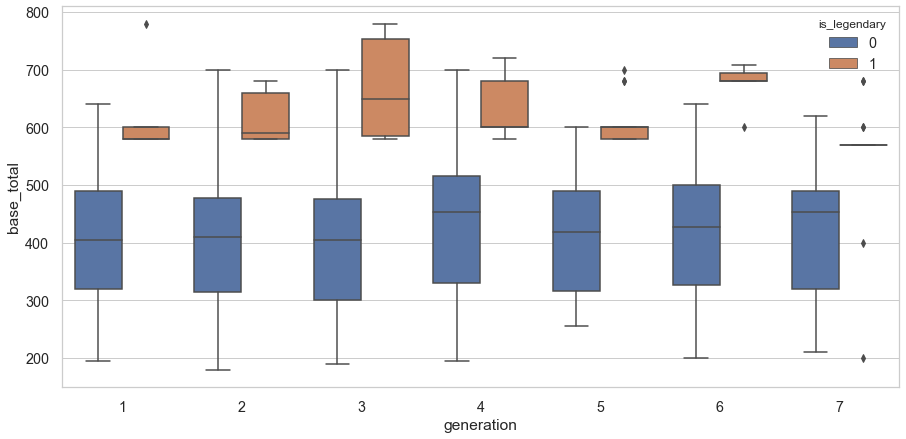

In [69]:
fig,axes=plt.subplots()
sns.boxplot(x='generation', y='base_total', hue='is_legendary', data=df2)
fig.set_size_inches(15,7)

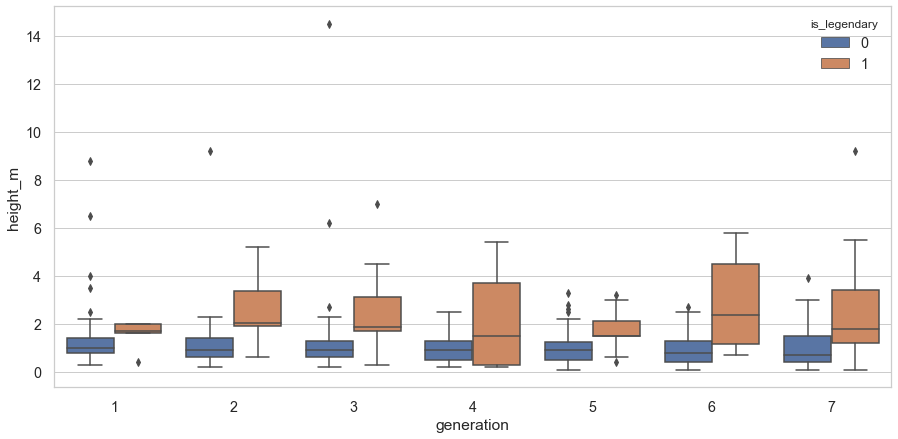

In [74]:
fig,axes=plt.subplots()
sns.boxplot(x='generation', y='height_m', hue='is_legendary', data=df2)
fig.set_size_inches(15,7)

In [75]:
fig,axes=plt.subplots()
sns.boxplot(x='generation', y='weight_kg', hue='is_legendary', data=df2)
fig.set_size_inches(15,7)

#### Comparison of Features Based on Generation

In [52]:
df_generation = df2.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
fig = px.line(df_generation)
fig.show()

# df_generation.plot.line(figsize=(15, 6))

__Inference:__
- Generation 7 Pokemons have Highest Average Attack, Defense & Special Defense Values

#### Comparison of Features Based on Type1

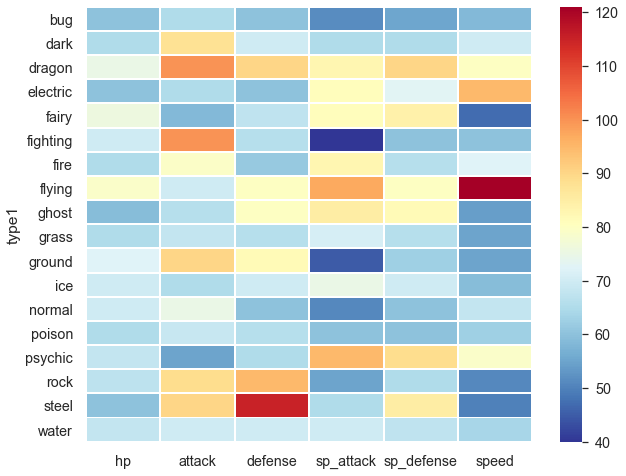

In [76]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    df2.groupby('type1').median()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']], 
    linewidths=1,
    cmap='RdYlBu_r', ax=ax
)

__Inference:__
- Flying-type Pokemon are really fast, which makes intuitive sense
- Among the Pokemon with the highest defense are Steel and Rock types

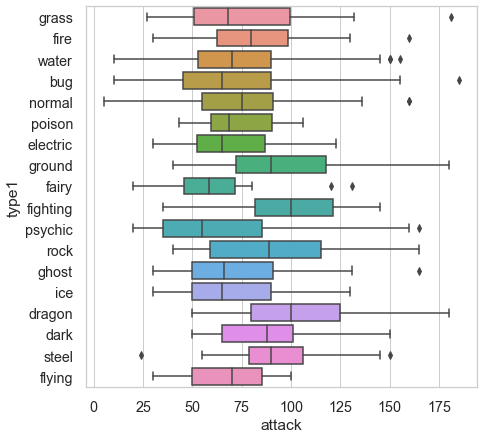

In [82]:
fig,axes=plt.subplots()
sns.boxplot(x='attack', y='type1', data=df2)
fig.set_size_inches(7,7)

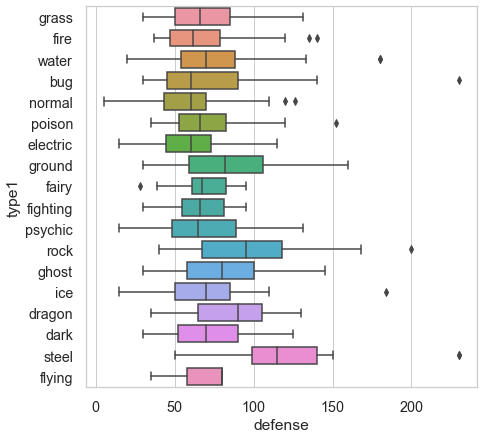

In [83]:
fig,axes=plt.subplots()
sns.boxplot(x='defense', y='type1', data=df2)
fig.set_size_inches(7,7)

In [84]:
fig,axes=plt.subplots()
sns.boxplot(x='speed', y='type1', data=df2)
fig.set_size_inches(7,7)

<a id=section6></a>

## 6. Feature Engineering

### Check Correlation

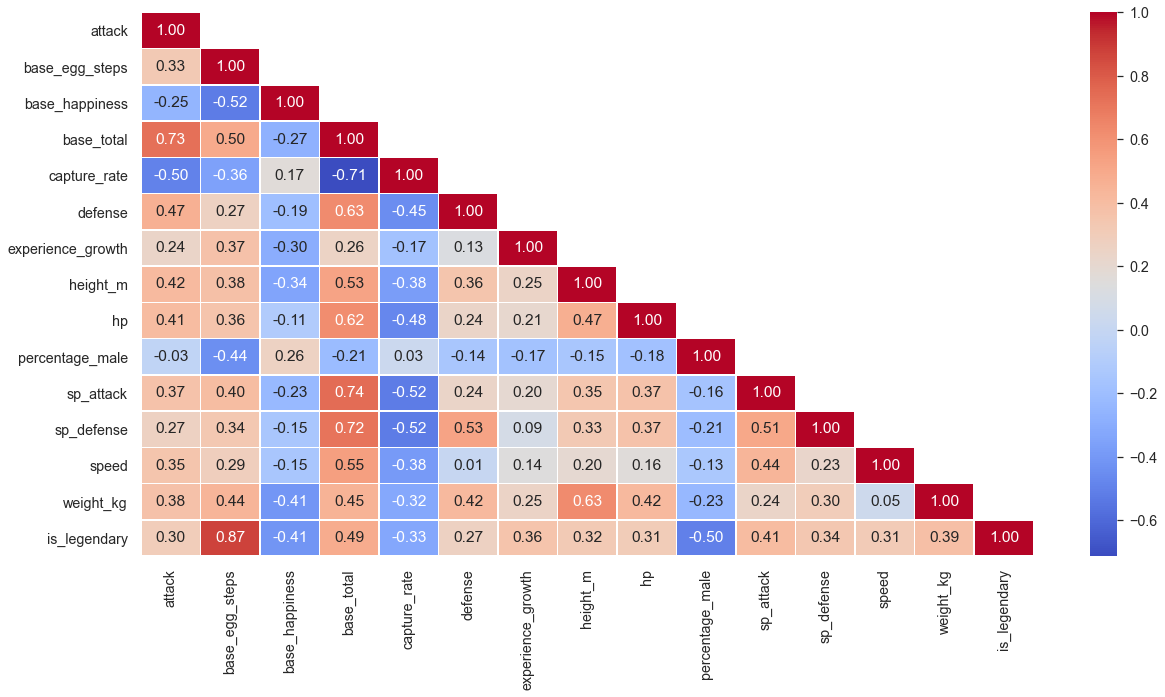

In [102]:
corr_features = ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth',
                 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'is_legendary']
cor_mat = df2[corr_features].corr()
mask = np.array(cor_mat)
#Mask Upper Triangle of the Matrix
mask[np.tril_indices_from(mask)] = False
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data=cor_mat, mask=mask, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f', ax=ax)

__Inferences:__
- base_egg_steps is highly correlated with the target variable i.e. is_legendary

### Dropping Features

- We have ID Features like japanese_name, name and pokedex_number
- Based on Analysis, Features like abilities and against_* are well represented with other Features like attack and defense
- Categorical Features like classification and generation does not provide better insight in predicting legendaries
- Hence i will drop all above features before applying ML Models

In [255]:
#Drop ID Features
df3 = df2.drop(['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy',
                'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground',
                'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel',
                'against_water', 'classification', 'japanese_name', 'name', 'pokedex_number', 'generation'], axis=1)

#### Check Shape after Dropping Features

In [256]:
df3.shape

(801, 17)

#### Check Columns after Dropping Features

In [257]:
df3.columns

Index(['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'is_legendary'],
      dtype='object')

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attack             801 non-null    int64  
 1   base_egg_steps     801 non-null    int64  
 2   base_happiness     801 non-null    int64  
 3   base_total         801 non-null    int64  
 4   capture_rate       801 non-null    int32  
 5   defense            801 non-null    int64  
 6   experience_growth  801 non-null    int64  
 7   height_m           801 non-null    float64
 8   hp                 801 non-null    int64  
 9   percentage_male    801 non-null    float64
 10  sp_attack          801 non-null    int64  
 11  sp_defense         801 non-null    int64  
 12  speed              801 non-null    int64  
 13  type1              801 non-null    object 
 14  type2              801 non-null    object 
 15  weight_kg          801 non-null    float64
 16  is_legendary       801 non

### Prepare X and y for Applying Machine Learning Models

In [260]:
df4 = df3.copy()
X = df4.loc[:,df4.columns != 'is_legendary']
X.head()

attack  base_egg_steps  base_happiness  base_total  capture_rate  defense  \
0      49            5120              70         318            45       49   
1      62            5120              70         405            45       63   
2     100            5120              70         625            45      123   
3      52            5120              70         309            45       43   
4      64            5120              70         405            45       58   

   experience_growth  height_m  hp  percentage_male  sp_attack  sp_defense  \
0            1059860       0.7  45             88.1         65          65   
1            1059860       1.0  60             88.1         80          80   
2            1059860       2.0  80             88.1        122         120   
3            1059860       0.6  39             88.1         60          50   
4            1059860       1.1  58             88.1         80          65   

   speed  type1   type2  weight_kg  
0     45  grass  poison        6.9  
1     60  grass  poison       13.0  
2     80  grass  poison      100.0  
3     65   fire    None        8.5  
4     80   fire    None       19.0

In [261]:
y = df4['is_legendary']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_legendary, dtype: int64

### Create List of Categorical Explanatory Variables & Numerical Explanatory Variables

In [263]:
#Select categorical columns
categorical_cols = [name for name in X.columns if X[name].dtype == 'object']
print(categorical_cols)

#Select numerical columns
numerical_cols = [name for name in X.columns if X[name].dtype != 'object']
print(numerical_cols)

['type1', 'type2']
['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']


### Apply OHE (One Hot Encoding) to Categorical Explanatory Variables

In [264]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first = True)
X.head()

attack  base_egg_steps  base_happiness  base_total  capture_rate  defense  \
0      49            5120              70         318            45       49   
1      62            5120              70         405            45       63   
2     100            5120              70         625            45      123   
3      52            5120              70         309            45       43   
4      64            5120              70         405            45       58   

   experience_growth  height_m  hp  percentage_male  ...  type2_ghost  \
0            1059860       0.7  45             88.1  ...            0   
1            1059860       1.0  60             88.1  ...            0   
2            1059860       2.0  80             88.1  ...            0   
3            1059860       0.6  39             88.1  ...            0   
4            1059860       1.1  58             88.1  ...            0   

   type2_grass  type2_ground  type2_ice  type2_normal  type2_poison  \
0            0             0          0             0             1   
1            0             0          0             0             1   
2            0             0          0             0             1   
3            0             0          0             0             0   
4            0             0          0             0             0   

   type2_psychic  type2_rock  type2_steel  type2_water  
0              0           0            0            0  
1              0           0            0            0  
2              0           0            0            0  
3              0           0            0            0  
4              0           0            0            0  

[5 rows x 49 columns]

#### Check if One Hot Encoding is Successful

In [265]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attack             801 non-null    int64  
 1   base_egg_steps     801 non-null    int64  
 2   base_happiness     801 non-null    int64  
 3   base_total         801 non-null    int64  
 4   capture_rate       801 non-null    int32  
 5   defense            801 non-null    int64  
 6   experience_growth  801 non-null    int64  
 7   height_m           801 non-null    float64
 8   hp                 801 non-null    int64  
 9   percentage_male    801 non-null    float64
 10  sp_attack          801 non-null    int64  
 11  sp_defense         801 non-null    int64  
 12  speed              801 non-null    int64  
 13  weight_kg          801 non-null    float64
 14  type1_dark         801 non-null    uint8  
 15  type1_dragon       801 non-null    uint8  
 16  type1_electric     801 non

- We can see that Categorical Data Types are No More Present

### Splitting X and y into training and test datasets

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Checking the shape of X and y of train dataset

In [274]:
print(X_train.shape)
print(y_train.shape)

(640, 49)
(640,)


#### Checking the shape of X and y of test dataset

In [275]:
print(X_test.shape)
print(y_test.shape)

(161, 49)
(161,)


### Apply Standard Scaling to Numerical Explanatory Variables

In [276]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

<a id=section7></a>

## 7. Model Development & Evaluation

#### Define Function for Applying Model

In [277]:
def classify(model, xtrain, ytrain, xtest):
    clf = model
    clf.fit(xtrain, ytrain)
    pred = clf.predict(xtest)
    return pred

#### Define Function for Displaying Confusion Matrix and Classification Report

In [281]:
def print_reports(ytest, ypred):
    #print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-\n")
    accuracy = accuracy_score(ytest, ypred)
    #print("Accuracy Score: ", accuracy)
    precision = precision_score(ytest, ypred)
    #print("\nPrecision Score: ", precision)
    recall = recall_score(ytest, ypred)
    #print("\nRecall Score: ", recall)
    f1 = f1_score(ytest, ypred)
    #print("\nF1 Score: ", f1)
    print("\n------------------Confusion Matrix------------------\n")
    cm = pd.DataFrame(confusion_matrix(ytest, ypred))
    cm.index = ['Actual Non-Legendary','Actual Legendary']
    cm.columns = ['Predicted Non-Legendary','Predicted Legendary']
    print(cm)
    print("\n----------------Classification Report----------------\n")
    target_names = ['Non-Legendary', 'Legendary']
    print(classification_report(ytest, ypred, target_names=target_names, digits=4))
    
    return (accuracy, precision, recall, f1)

### Instantiating Logistic Regression using scikit learn with default parameters

In [285]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg.score(X_train, y_train)
y_pred_test_LR = LogReg.predict(X_test)
LR_accuracy, LR_precision, LR_recall, LR_f1 = print_reports(y_test, y_pred_test_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9984375


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            3                   14

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9795    0.9931    0.9862       144
    Legendary     0.9333    0.8235    0.8750        17

     accuracy                         0.9752       161
    macro avg     0.9564    0.9083    0.9306       161
 weighted avg     0.9746    0.9752    0.9745       161



### Instantiating Decision Tree Classifier using scikit learn with default parameters

In [286]:
DT = DecisionTreeClassifier(random_state = 20)
DT.fit(X_train, y_train)
DT.score(X_train, y_train)
y_pred_test_DT = DT.predict(X_test)
DT_accuracy, DT_precision, DT_recall, DT_f1 = print_reports(y_test, y_pred_test_DT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

1.0


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      144                    0
Actual Legendary                            0                   17

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     1.0000    1.0000    1.0000       144
    Legendary     1.0000    1.0000    1.0000        17

     accuracy                         1.0000       161
    macro avg     1.0000    1.0000    1.0000       161
 weighted avg     1.0000    1.0000    1.0000       161



### Instantiating Random Forest Classification using scikit learn with default parameters

In [287]:
RF = RandomForestClassifier(random_state = 20)
RF.fit(X_train, y_train)
RF.score(X_train, y_train)
y_pred_test_RF = RF.predict(X_test)
RF_accuracy, RF_precision, RF_recall, RF_f1 = print_reports(y_test, y_pred_test_RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

1.0


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            1                   16

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9931    0.9931    0.9931       144
    Legendary     0.9412    0.9412    0.9412        17

     accuracy                         0.9876       161
    macro avg     0.9671    0.9671    0.9671       161
 weighted avg     0.9876    0.9876    0.9876       161



### Instantiating K Nearest Neighbour Classifier using scikit learn with default parameters

In [288]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN.score(X_train, y_train)
y_pred_test_KNN = KNN.predict(X_test)
KNN_accuracy, KNN_precision, KNN_recall, KNN_f1 = print_reports(y_test, y_pred_test_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.99375


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            3                   14

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9795    0.9931    0.9862       144
    Legendary     0.9333    0.8235    0.8750        17

     accuracy                         0.9752       161
    macro avg     0.9564    0.9083    0.9306       161
 weighted avg     0.9746    0.9752    0.9745       161



### Instantiating Naive Bayes using scikit learn with default parameters

In [289]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB.score(X_train, y_train)
y_pred_test_NB = NB.predict(X_test)
NB_accuracy, NB_precision, NB_recall, NB_f1 = print_reports(y_test, y_pred_test_NB)

GaussianNB(priors=None, var_smoothing=1e-09)

0.375


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                       53                   91
Actual Legendary                            6                   11

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.8983    0.3681    0.5222       144
    Legendary     0.1078    0.6471    0.1849        17

     accuracy                         0.3975       161
    macro avg     0.5031    0.5076    0.3535       161
 weighted avg     0.8148    0.3975    0.4866       161



### Instantiating SVM using scikit learn with default hyperparameter

In [290]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
svc_accuracy, svc_precision, svc_recall, svc_f1 = print_reports(y_test, y_pred_test_svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9953125


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            1                   16

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9931    0.9931    0.9931       144
    Legendary     0.9412    0.9412    0.9412        17

     accuracy                         0.9876       161
    macro avg     0.9671    0.9671    0.9671       161
 weighted avg     0.9876    0.9876    0.9876       161



### Instantiating SVM using scikit learn with default linear kernel

In [291]:
svc_l = SVC(kernel='linear')
svc_l.fit(X_train, y_train)
svc_l.score(X_train, y_train)
y_pred_test_svc_l = svc_l.predict(X_test)
svc_l_accuracy, svc_l_precision, svc_l_recall, svc_l_f1 = print_reports(y_test, y_pred_test_svc_l)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

1.0


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      142                    2
Actual Legendary                            1                   16

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9930    0.9861    0.9895       144
    Legendary     0.8889    0.9412    0.9143        17

     accuracy                         0.9814       161
    macro avg     0.9409    0.9636    0.9519       161
 weighted avg     0.9820    0.9814    0.9816       161



### Instantiating SVM using scikit learn with default polynomial  kernel

In [292]:
svc_p = SVC(kernel='poly')
svc_p.fit(X_train, y_train)
svc_p.score(X_train, y_train)
y_pred_test_svc_p = svc_p.predict(X_test)
svc_p_accuracy, svc_p_precision, svc_p_recall, svc_p_f1 = print_reports(y_test, y_pred_test_svc_p)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

1.0


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            3                   14

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9795    0.9931    0.9862       144
    Legendary     0.9333    0.8235    0.8750        17

     accuracy                         0.9752       161
    macro avg     0.9564    0.9083    0.9306       161
 weighted avg     0.9746    0.9752    0.9745       161



### Instantiating SVM using scikit learn with default rbf  kernel

In [293]:
svc_r = SVC(kernel='rbf')
svc_r.fit(X_train, y_train)
svc_r.score(X_train, y_train)
y_pred_test_svc_r = svc_r.predict(X_test)
svc_r_accuracy, svc_r_precision, svc_r_recall, svc_r_f1 = print_reports(y_test, y_pred_test_svc_r)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9953125


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            1                   16

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9931    0.9931    0.9931       144
    Legendary     0.9412    0.9412    0.9412        17

     accuracy                         0.9876       161
    macro avg     0.9671    0.9671    0.9671       161
 weighted avg     0.9876    0.9876    0.9876       161



### Using GridSearch Technique with Random Forest to find best best parameters

In [305]:
rf_tuned_parameters = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

RF_gs = GridSearchCV(RandomForestClassifier(), rf_tuned_parameters, cv=10, scoring='accuracy')

In [306]:
RF_gs.fit(X_train, y_train)
RF_gs.score(X_train, y_train)
print(RF_gs.best_score_)
print(RF_gs.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

1.0

0.9984375
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [307]:
y_pred_test_RF_gs = RF_gs.predict(X_test)
RF_gs_accuracy, RF_gs_precision, RF_gs_recall, RF_gs_f1 = print_reports(y_test, y_pred_test_RF_gs)


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      144                    0
Actual Legendary                            1                   16

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9931    1.0000    0.9965       144
    Legendary     1.0000    0.9412    0.9697        17

     accuracy                         0.9938       161
    macro avg     0.9966    0.9706    0.9831       161
 weighted avg     0.9938    0.9938    0.9937       161



### Using GridSearch Technique with SVC to find best best parameters

In [241]:
svm_tuned_parameters = { 'C':range(1,11),
                         'gamma':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
                         'kernel':['linear','rbf']
                       }

svc_gs = GridSearchCV(SVC(), svm_tuned_parameters, cv=10, scoring='accuracy')

In [296]:
svc_gs.fit(X_train, y_train)
svc_gs.score(X_train, y_train)
print(svc_gs.best_score_)
print(svc_gs.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': range(1, 11),
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

0.9984375

0.99375
{'C': 3, 'gamma': 0.05, 'kernel': 'rbf'}


In [297]:
y_pred_test_svc_gs = svc_gs.predict(X_test)
svc_gs_accuracy, svc_gs_precision, svc_gs_recall, svc_gs_f1 = print_reports(y_test, y_pred_test_svc_gs)


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                            1                   16

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9931    0.9931    0.9931       144
    Legendary     0.9412    0.9412    0.9412        17

     accuracy                         0.9876       161
    macro avg     0.9671    0.9671    0.9671       161
 weighted avg     0.9876    0.9876    0.9876       161



### Instantiating Gradient Boosting Classification using scikit learn

In [301]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
GB.fit(X_train, y_train)
GB.score(X_train, y_train)
y_pred_test_GB = GB.predict(X_test)
GB_accuracy, GB_precision, GB_recall, GB_f1 = print_reports(y_test, y_pred_test_GB)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.984375


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      144                    0
Actual Legendary                            0                   17

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     1.0000    1.0000    1.0000       144
    Legendary     1.0000    1.0000    1.0000        17

     accuracy                         1.0000       161
    macro avg     1.0000    1.0000    1.0000       161
 weighted avg     1.0000    1.0000    1.0000       161



### Instantiating Extreme Gradient Boosting Classification

In [302]:
XGB = XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
XGB.fit(X_train, y_train)
XGB.score(X_train, y_train)
y_pred_test_XGB = XGB.predict(X_test)
XGB_accuracy, XGB_precision, XGB_recall, XGB_f1 = print_reports(y_test, y_pred_test_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

1.0


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      143                    1
Actual Legendary                           13                    4

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     0.9167    0.9931    0.9533       144
    Legendary     0.8000    0.2353    0.3636        17

     accuracy                         0.9130       161
    macro avg     0.8583    0.6142    0.6585       161
 weighted avg     0.9043    0.9130    0.8911       161



### Using Linear Discriminant Analysis for Classification

In [303]:
LDA = LinearDiscriminantAnalysis(n_components=1)
LDA.fit(X_train, y_train)
LDA.score(X_train, y_train)
y_pred_test_LDA = LDA.predict(X_test)
LDA_accuracy, LDA_precision, LDA_recall, LDA_f1 = print_reports(y_test, y_pred_test_LDA)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

0.9875


------------------Confusion Matrix------------------

                      Predicted Non-Legendary  Predicted Legendary
Actual Non-Legendary                      144                    0
Actual Legendary                            0                   17

----------------Classification Report----------------

               precision    recall  f1-score   support

Non-Legendary     1.0000    1.0000    1.0000       144
    Legendary     1.0000    1.0000    1.0000        17

     accuracy                         1.0000       161
    macro avg     1.0000    1.0000    1.0000       161
 weighted avg     1.0000    1.0000    1.0000       161



<a id=section8></a>

## 8. Model Comparison

In [310]:
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNearestNeighbors', 'GaussianNB',
               'SVC', 'linearSVC', 'polySVC', 'rbfSVC', 'GridSearchRandomForest', 'GridSearchSVC', 'Gradient Boosting',
               'Extreme Gradient Boosting', 'LDA']

model_accuracy = [LR_accuracy, DT_accuracy, RF_accuracy, KNN_accuracy, NB_accuracy, svc_accuracy, svc_l_accuracy,
                  svc_p_accuracy, svc_r_accuracy, RF_gs_accuracy, svc_gs_accuracy, GB_accuracy, XGB_accuracy, LDA_accuracy]

model_precision = [LR_precision, DT_precision, RF_precision, KNN_precision, NB_precision, svc_precision, svc_l_precision,
                  svc_p_precision, svc_r_precision, RF_gs_precision, svc_gs_precision, GB_precision, XGB_precision,
                  LDA_precision]

model_recall = [LR_recall, DT_recall, RF_recall, KNN_recall, NB_recall, svc_recall, svc_l_recall, svc_p_recall, svc_r_recall,
                RF_gs_recall, svc_gs_recall, GB_recall, XGB_recall, LDA_recall]

model_f1 = [LR_f1, DT_f1, RF_f1, KNN_f1, NB_f1, svc_f1, svc_l_f1, svc_p_f1, svc_r_f1, RF_gs_f1, svc_gs_f1, GB_f1, XGB_f1,
            LDA_f1]

scores_dict = {'Model':model_names, 'Accuracy':model_accuracy, 'F1':model_f1, 'Precision':model_precision,
                 'Recall':model_recall}

scores_df = pd.DataFrame(scores_dict)
scores_df

Model  Accuracy        F1  Precision    Recall
0          LogisticRegression  0.975155  0.875000   0.933333  0.823529
1      DecisionTreeClassifier  1.000000  1.000000   1.000000  1.000000
2      RandomForestClassifier  0.987578  0.941176   0.941176  0.941176
3           KNearestNeighbors  0.975155  0.875000   0.933333  0.823529
4                  GaussianNB  0.397516  0.184874   0.107843  0.647059
5                         SVC  0.987578  0.941176   0.941176  0.941176
6                   linearSVC  0.981366  0.914286   0.888889  0.941176
7                     polySVC  0.975155  0.875000   0.933333  0.823529
8                      rbfSVC  0.987578  0.941176   0.941176  0.941176
9      GridSearchRandomForest  0.993789  0.969697   1.000000  0.941176
10              GridSearchSVC  0.987578  0.941176   0.941176  0.941176
11          Gradient Boosting  1.000000  1.000000   1.000000  1.000000
12  Extreme Gradient Boosting  0.913043  0.363636   0.800000  0.235294
13                        LDA  1.000000  1.000000   1.000000  1.000000

In [329]:
# f, ax = plt.subplots(figsize=(15, 5))
# ax.set(xlim=(0.9, 1), xlabel="Accuracy", ylabel="Model")
# sns.barplot(x='Accuracy', y='Model', data=scores_df)

fig = px.bar(scores_df, x='Accuracy', y='Model', color='Model',
             range_x=(0.9, 1), title='Comparison of Models Based on Accuracy Scores')
fig.update_layout(showlegend=False)

### Feature Importances in Gradient Boosting Algorithm

In [330]:
feature_importances = pd.DataFrame(GB.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
type2_fairy          0.797318
base_egg_steps       0.202682
type2_fighting       0.000000
type1_poison         0.000000
type1_psychic        0.000000
type1_rock           0.000000
type1_steel          0.000000
type1_water          0.000000
type2_bug            0.000000
type2_dark           0.000000
type2_dragon         0.000000
type2_electric       0.000000
attack               0.000000
type1_normal         0.000000
type2_flying         0.000000
type2_ghost          0.000000
type2_grass          0.000000
type2_ground         0.000000
type2_ice            0.000000
type2_normal         0.000000
type2_poison         0.000000
type2_psychic        0.000000
type2_rock           0.000000
type2_steel          0.000000
type2_fire           0.000000
type1_ice            0.000000
type1_ground         0.000000
sp_defense           0.000000
base_happiness       0.000000
base_total           0.000000
capture_rate         0.000000
defense              0.000000
experience_growth    0.000000
height_m             0.000000
hp                   0.000000
percentage_male      0.000000
sp_attack            0.000000
speed                0.000000
type1_grass          0.000000
weight_kg            0.000000
type1_dark           0.000000
type1_dragon         0.000000
type1_electric       0.000000
type1_fairy          0.000000
type1_fighting       0.000000
type1_fire           0.000000
type1_flying         0.000000
type1_ghost          0.000000
type2_water          0.000000

In [335]:
features_to_plot = feature_importances.loc[lambda df: df['importance'] != 0]
fig = px.pie(values=features_to_plot.values, names=features_to_plot.index,
             title='Importance of Features in Gradient Boosting Algorithm')
fig.show()

### Feature Coefficients in Linear Discriminant Analysis

In [450]:
imp_df = pd.DataFrame(data=LDA.coef_, columns=X_train.columns)
imp_df.T

0
attack              0.776539
base_egg_steps     13.895233
base_happiness      1.547979
base_total          0.437133
capture_rate       -0.130655
defense             0.584564
experience_growth   1.064535
height_m           -0.745486
hp                 -1.273127
percentage_male    -2.949849
sp_attack           0.628228
sp_defense         -0.052451
speed               0.515942
weight_kg           1.337871
type1_dark          0.542662
type1_dragon       -7.447933
type1_electric      1.369155
type1_fairy         0.139436
type1_fighting      1.152977
type1_fire          3.429399
type1_flying        3.173662
type1_ghost        -1.657396
type1_grass         0.858907
type1_ground       -1.102998
type1_ice           0.739502
type1_normal       -1.375316
type1_poison        0.135206
type1_psychic      -0.474520
type1_rock         -0.675370
type1_steel        -2.544066
type1_water         2.190630
type2_bug           0.837363
type2_dark         -1.732031
type2_dragon       -2.890537
type2_electric      1.707517
type2_fairy        13.158736
type2_fighting      3.848456
type2_fire         -3.357688
type2_flying        2.404729
type2_ghost        -1.456931
type2_grass         0.691950
type2_ground       -1.103489
type2_ice          -1.599929
type2_normal       -5.652662
type2_poison        0.954408
type2_psychic      -1.806566
type2_rock         -4.370825
type2_steel         1.928162
type2_water        -0.466999

Text(0.5, 0.98, 'LDA Feature Coefficients')

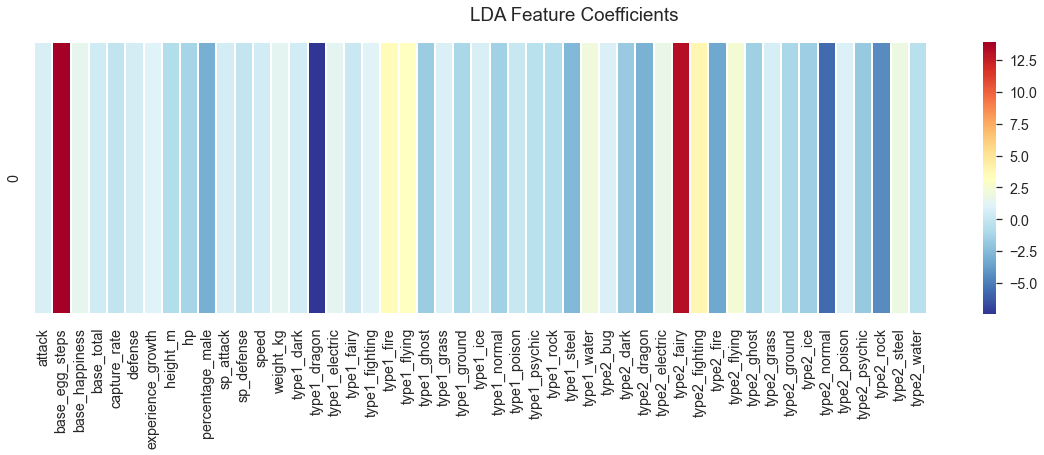

In [451]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.heatmap(imp_df, linewidths=1, cmap='RdYlBu_r', ax=ax)
plt.suptitle('LDA Feature Coefficients')

### Using Pipeline for Automating the Machine Learning Workflow

In [402]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

#Split Independent Variables & Dependent Variable
target_feature_name = 'is_legendary'
X1, y1 = df1.loc[:,df1.columns != target_feature_name], df1[target_feature_name]

#Drop Unwanted Independent / Explanatory Variables
subset_features = ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'defense', 'experience_growth',
                   'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg']
X1 = X1[subset_features]

#Select numeric features
numeric_features = [name for name in X1.columns if X1[name].dtype != 'object']

#Select categorical features
categorical_features = [name for name in X1.columns if X1[name].dtype == 'object']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Define the data preparation for the columns
t = [('num', numeric_transformer, numeric_features),
     ('cat', categorical_transformer, categorical_features)]
col_transform = ColumnTransformer(transformers=t)

#Define the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

#Define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[
    ('prep', col_transform),
    ('m', model)])

#cross-validation using train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
pipeline.fit(X1_train, y1_train)
print("Accuracy Score using Train Test Cross Validation: %.3f" % pipeline.score(X1_test, y1_test))

#Define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)
#Evaluate the pipeline using cross validation and calculate accuracy
scores = cross_val_score(pipeline, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
#Summarize the Model Performance
print('Accuracy Score using K-Fold Cross Validation: %.3f' % scores.mean())

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                     

Accuracy Score using Train Test Cross Validation: 0.994
Accuracy Score using K-Fold Cross Validation: 0.986


<a id=section9></a>

## 9. Conclusion

- We corrected data type for feature (**capture_rate**) in the dataset
- We imputed missing values for features like **weight_kg & height_m**
- We did scaling for numerical features and one hot encoding for categorical features 
- We **developed different Machine Learning Algorithms i.e. Logistic Regression, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbors, Naive Bayes, Support Vector Classifier, Gradient Boosting Classifier, Extreme Gradient Boosting Classifier and Linear Discriminant Analysis**
- **Gradient Boosting Classifier and Linear Discriminant Analysis (LDA)** outperformed all the models achieving perfect __100%__ accuracy score
- **Decision Tree Classifier** also achieved __100%__ accuracy score but it is an __Overfit__ Model due to High Training Score
- We also used __Pipeline__ for Automating the Machine Learning Workflow